### Домашнее задание «Визуализация данных»

Heart Attack Analysis & Prediction Dataset  Kaggle Datasets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [2]:
### загружаю датасет

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### переименовываю на русский столбцы

df.columns = ['возраст', 'пол', 'боль', 'давление', 'холестерин', 'сахар', 
              'кардиограмма', 'макс СС', 'стенокардия', 'предыдущий пик',
              'наклон нагр', 'кол-во крупных сосудов', 'скорость Thal',  'диагноз' ]
df.head()

,возраст,пол,боль,давление,холестерин,сахар,кардиограмма,макс СС,стенокардия,предыдущий пик,наклон нагр,кол-во крупных сосудов,скорость Thal,диагноз
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Описание столбцов

age - возраст в годах   
sex - пол (1 = мужской; 0 = женский)   
cp - тип боли в груди (1 = типичная стенокардия; 2 = атипичная стенокардия; 3 = неангинальная боль; 4 = бессимптомная)   
trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)   
хол - холесторал сыворотки в мг / дл   
fbs - уровень сахара в крови натощак> 120 мг / дл (1 = истина; 0 = ложь)   
restecg - результаты электрокардиографии в покое (0 = нормальный; 1 = наличие ST-T; 2 = гипертрофия)   
талах - максимальная достигнутая частота сердечных сокращений   
exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)   
oldpeak - депрессия ST, вызванная упражнениями по сравнению с отдыхом   
slope - наклон сегмента ST при пиковой нагрузке (1 = восходящий; 2 = плоский; 3 = нисходящий)   
ca - количество крупных сосудов (0-3), окрашенных флурозопией   
тал - 3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект   
число - прогнозируемый признак - 
диагноз сердечного заболевания (статус ангиографического заболевания)
(значение 0 = сужение диаметра <50%; значение 1 = сужение диаметра> 50%)

In [17]:
df.info()

###  признаки int и float, это ок. Если бы были, например, object, надо привести к int/float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   возраст                 303 non-null    int64  
 1   пол                     303 non-null    int64  
 2   боль                    303 non-null    int64  
 3   давление                303 non-null    int64  
 4   холестерин              303 non-null    int64  
 5   сахар                   303 non-null    int64  
 6   кардиограмма            303 non-null    int64  
 7   макс СС                 303 non-null    int64  
 8   стенокардия             303 non-null    int64  
 9   предыдущий пик          303 non-null    float64
 10  наклон нагр             303 non-null    int64  
 11  кол-во крупных сосудов  303 non-null    int64  
 12  скорость Thal           303 non-null    int64  
 13  диагноз                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [51]:
###   смотрим общие статистики 

df.describe()

,возраст,пол,боль,давление,холестерин,сахар,кардиограмма,макс СС,стенокардия,предыдущий пик,наклон нагр,кол-во крупных сосудов,скорость Thal,диагноз
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
print(df.shape)

(303, 14)


In [22]:
### сортирую по возрасту

df1 = df.sort_values('возраст')
df1.head()

,возраст,пол,боль,давление,холестерин,сахар,кардиограмма,макс СС,стенокардия,предыдущий пик,наклон нагр,кол-во крупных сосудов,скорость Thal,диагноз
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


<AxesSubplot:title={'center':'Возраст'}, ylabel='Frequency'>

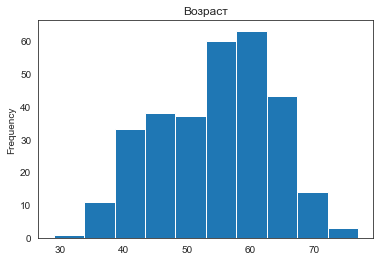

In [88]:
### В этой диаграмме показываю разброс возрастов в выборке. 
df1['возраст'].plot(kind = "hist", xlabel = 'возраст', title = 'Возраст')


<AxesSubplot:xlabel='возраст', ylabel='Density'>

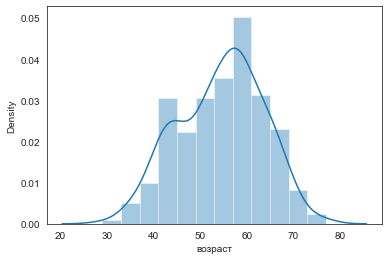

In [27]:
### Аналогичный график строю в seaborn
sns.distplot(df.возраст)

In [76]:
№№№df2 = df[['возраст', 'диагноз', 'пол']].sort_values('возраст')
df2.head()

,возраст,диагноз,пол
72,29,1,1
58,34,1,1
125,34,1,0
239,35,0,1
65,35,1,0


In [96]:
df2 = df[['возраст', 'пол', 'диагноз']]
df2.head()

,возраст,пол,диагноз
0,63,1,1
1,37,1,1
2,41,0,1
3,56,1,1
4,57,0,1


In [99]:
df2.groupby(['диагноз', 'пол']).count()

возраст
диагноз пол         
0       0         24
        1        114
1       0         72
        1         93

In [103]:
### Считаем количество тех, у кого подтвержден диагноз ССЗ

heart_attack_count = df2[['пол','диагноз']].groupby('диагноз').count()
heart_attack_count

,пол
диагноз,
0,138
1,165


<AxesSubplot:title={'center':'Количество людей здоровых и с ССЗ'}, xlabel='диагноз'>

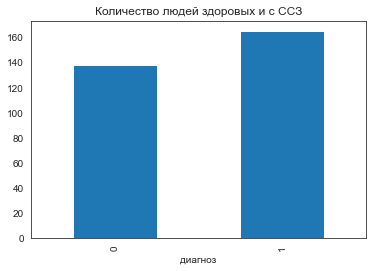

In [91]:
### и выводим на столбчатой диаграмме. Правый столбец больше, значит людей с ССЗ больше

heart_attack_count['пол'].plot(kind = "bar", label = True, title = 'Количество людей здоровых и с ССЗ' )

<AxesSubplot:title={'center':'Кого больше?'}, ylabel='Frequency'>

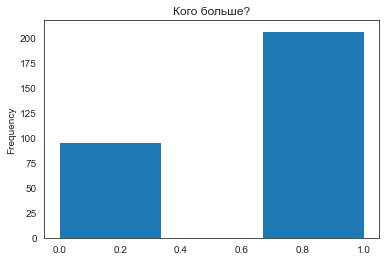

In [87]:
### Кого больше?  Мужчин!    ???? Олег, почему по х не выводит название оси? 

df['пол'].plot(kind = "hist", bins = 3, title = 'Кого больше?', xlabel = 'пол')

Text(0.5, 1.0, 'Зависимость ССЗ и пола людей')

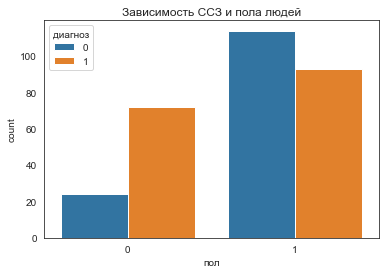

In [95]:
### с помощью seaborn вывожу столбчатую диаграмму, на которой видно, что в выборке женщин, подверженных ССЗ больше, чем мужчин. 


sb.countplot(x = 'пол',   hue = 'диагноз', data = df).set_title('Зависимость ССЗ и пола людей')

<AxesSubplot:title={'center':'Зависимость возраста и холестерина'}, xlabel='возраст', ylabel='холестерин'>

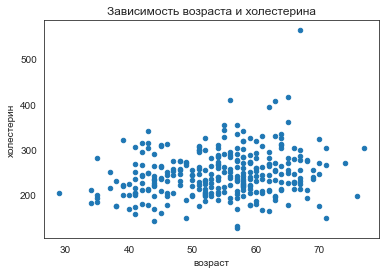

In [113]:
### На точечной диаграмме показана зависимость возраста и значения холестерина. Также можно увидеть выбросы.  

df.plot(x="возраст", y="холестерин", kind="scatter", title = 'Зависимость возраста и холестерина')

<AxesSubplot:title={'center':'Холестерин'}>

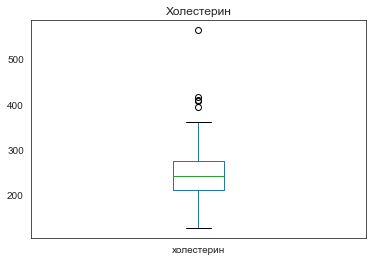

In [116]:
### Boxplot Смотрим выбросы


df.холестерин.plot(kind = 'box', title = 'Холестерин')

<AxesSubplot:title={'center':'Макс СС'}>

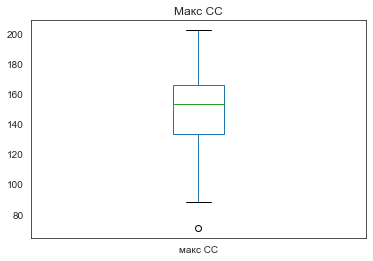

In [119]:
df['макс СС'].plot(kind = 'box', title = 'Макс СС')

На этом точечном графике показано, что уровень боли не зависит от возраста и давления. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

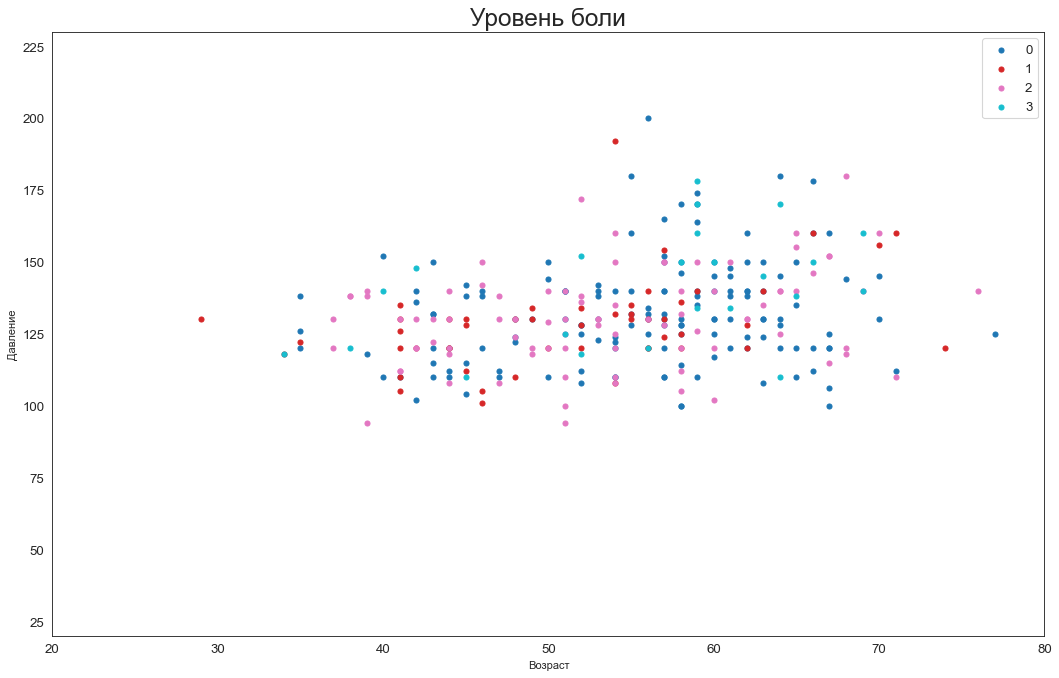

In [133]:
categories = np.unique(df['боль'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('возраст', 'давление', 
                data=df.loc[df.боль==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(20, 80), ylim=(20, 230),
              xlabel='Возраст', ylabel='Давление')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Уровень боли", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

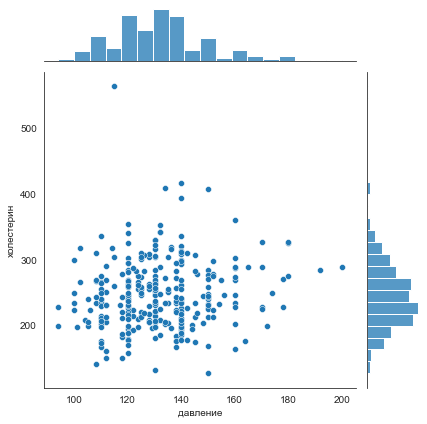

In [134]:
### красивый, но какой-то бесполезный) выброс, если только посмотреть

sns.jointplot(x='давление', y='холестерин', 
              data=df, kind='scatter')